#Get Parsers

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def convert_conllu_to_text_file(input_file, output_file, data_list_name):
    data_list = [[]]
    with open(input_file, "r") as f:
        for l in f:
            if not l.startswith("#"):
                if l.strip()=="":
                    if len(data_list[-1])>0:
                        data_list.append([])
                else:
                    row = l.split("\t")
                    if not "-" in row[0]:
                      data_list[-1].append(row[1])

    data_list.pop()

    data_rows = [ " ".join(row) for row in data_list ]
    data_text = "\n".join(data_rows)
    with open(output_file, 'w') as f:
        f.write(data_text)

    globals()[data_list_name] = data_list


In [3]:
convert_conllu_to_text_file("/content/drive/MyDrive/Supervised Project/SPC/en_gentle-ud-test.conllu", "gentle_raw.txt", "gentle_data")
convert_conllu_to_text_file("/content/drive/MyDrive/Supervised Project/SPC/en_lines-ud-test.conllu", "lines_raw.txt", "lines_data")
convert_conllu_to_text_file("/content/drive/MyDrive/Supervised Project/SPC/en_partut-ud-test.conllu", "partut_raw.txt", "partut_data")
convert_conllu_to_text_file("/content/drive/MyDrive/Supervised Project/SPC/en_gum-ud-test.conllu", "gum_raw.txt", "gum_data")
convert_conllu_to_text_file("/content/drive/MyDrive/Supervised Project/SPC/en_ewt-ud-test.conllu", "ewt_raw.txt", "ewt_data")
convert_conllu_to_text_file("/content/drive/MyDrive/Supervised Project/SPC/en_pud-ud-test.conllu", "pud_raw.txt", "pud_data")

## Stanza

In [4]:
!pip install stanza
import stanza

stanza.download('en')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.1/990.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 11.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-many

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Downloaded file to /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [5]:
import stanza
nlp_stanza = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma,depparse', tokenize_pretokenized=True)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


In [6]:
def process_text_file(file_path):
    with open(file_path, 'r') as f:
        file_content = f.read()

    # Process the text using Stanza
    result = nlp_stanza(file_content)
    return result

In [7]:
gentle_stanza = process_text_file("gentle_raw.txt")
lines_stanza = process_text_file("lines_raw.txt")
partut_stanza = process_text_file("partut_raw.txt")
gum_stanza = process_text_file("gum_raw.txt")
ewt_stanza = process_text_file("ewt_raw.txt")
pud_stanza = process_text_file("pud_raw.txt")

In [8]:
from stanza.utils.conll import CoNLL
CoNLL.write_doc2conll(gentle_stanza, "gentle_stanza.conllu")
CoNLL.write_doc2conll(lines_stanza, "lines_stanza.conllu")
CoNLL.write_doc2conll(partut_stanza, "partut_stanza.conllu")
CoNLL.write_doc2conll(gum_stanza, "gum_stanza.conllu")
CoNLL.write_doc2conll(ewt_stanza, "ewt_stanza.conllu")
CoNLL.write_doc2conll(pud_stanza, "pud_stanza.conllu")

## Trankit

In [9]:
!pip install trankit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.4/773.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 17.9 MB/s eta 0:00:00
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941172 sha256=09840abb0ff5959a03f5476f0feb476a0fb9dfb07a03933491e61dc24f1f35f1
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [10]:
from trankit import Pipeline, trankit2conllu

nlp_trankit = Pipeline(lang= 'english')

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

http://nlp.uoregon.edu/download/trankit/v1.0.0/xlm-roberta-base/english.zip


Downloading: 100%|██████████| 47.9M/47.9M [00:02<00:00, 19.0MiB/s]


Loading pretrained XLM-Roberta, this may take a while...


Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Loading tokenizer for english
Loading tagger for english
Loading lemmatizer for english
Loading NER tagger for english
Active language: english


In [11]:
from trankit import trankit2conllu
def process_data_and_save_to_conllu(data, output_file):
    # Perform part-of-speech tagging and dependency parsing
    trankit_output = nlp_trankit.posdep(data)

    # Convert Trankit output to CoNLL-U format
    conllu_doc = trankit2conllu(trankit_output)

    # Write the CoNLL-U document to a file
    with open(output_file, "w", encoding="utf-8") as f:
        f.write(conllu_doc)


In [12]:
process_data_and_save_to_conllu(gentle_data, "gentle_trankit.conllu")
process_data_and_save_to_conllu(lines_data, "lines_trankit.conllu")
process_data_and_save_to_conllu(partut_data, "partut_trankit.conllu")
process_data_and_save_to_conllu(gum_data, "gum_trankit.conllu")
process_data_and_save_to_conllu(ewt_data, "ewt_trankit.conllu")
process_data_and_save_to_conllu(pud_data, "pud_trankit.conllu")

# Compare parses

In [13]:
def read_conllu_and_parse_gold_data(input_file, gold_data):
    with open(input_file, "r") as f:
        for l in f:
            if not l.startswith("#"):
                if l.strip()=="":
                    if len(gold_data[-1])>0:
                        gold_data.append([])
                else:
                    row = l.split("\t")
                    if not "-" in row[0]:
                        gold_data[-1].append([row[0], row[1], row[3], row[6], row[7]])

    gold_data.pop()


In [14]:
gentle_gold, lines_gold, partut_gold, gum_gold, ewt_gold, pud_gold = [[]], [[]], [[]], [[]], [[]], [[]]

read_conllu_and_parse_gold_data("/content/drive/MyDrive/Supervised Project/SPC/en_gentle-ud-test.conllu", gentle_gold)
read_conllu_and_parse_gold_data("/content/drive/MyDrive/Supervised Project/SPC/en_lines-ud-test.conllu", lines_gold)
read_conllu_and_parse_gold_data("/content/drive/MyDrive/Supervised Project/SPC/en_partut-ud-test.conllu", partut_gold)
read_conllu_and_parse_gold_data("/content/drive/MyDrive/Supervised Project/SPC/en_gum-ud-test.conllu", gum_gold)
read_conllu_and_parse_gold_data("/content/drive/MyDrive/Supervised Project/SPC/en_ewt-ud-test.conllu", ewt_gold)
read_conllu_and_parse_gold_data("/content/drive/MyDrive/Supervised Project/SPC/en_pud-ud-test.conllu", pud_gold)

In [15]:
def read_and_parse_stanza_data(stanza_file):
    stanza_data = []

    for file in stanza_files:
        data = [[]]

        with open(file, "r") as f:
            for l in f:
                if not l.startswith("#"):
                    if l.strip() == "":
                        if len(data[-1]) > 0:
                            data.append([])
                    else:
                        row = l.split("\t")
                        if not "-" in row[0]:
                            data[-1].append([row[0], row[1], row[3], row[6], row[7]])

        data.pop()
        stanza_data.append(data)

    return stanza_data


In [16]:
stanza_files = ["gentle_stanza.conllu", "lines_stanza.conllu", "partut_stanza.conllu", "gum_stanza.conllu", "ewt_stanza.conllu", "pud_stanza.conllu"]
gentle_stanza2compare, lines_stanza2compare, partut_stanza2compare, gum_stanza2compare, ewt_stanza2compare, pud_stanza2compare = read_and_parse_stanza_data(stanza_files)

In [17]:
def read_and_parse_trankit_data(trankit_files):
    trankit_data = []

    for file in trankit_files:
        data = [[]]

        with open(file, "r") as f:
            for l in f:
                if not l.startswith("#"):
                    if l.strip() == "":
                        if len(data[-1]) > 0:
                            data.append([])
                    else:
                        row = l.split("\t")
                        if not "-" in row[0]:
                            data[-1].append([row[0], row[1], row[3], row[6], row[7]])

        data.pop()
        trankit_data.append(data)

    return trankit_data

In [18]:
trankit_files = ["gentle_trankit.conllu", "lines_trankit.conllu", "partut_trankit.conllu", "gum_trankit.conllu", "ewt_trankit.conllu", "pud_trankit.conllu"]
gentle_trankit2compare, lines_trankit2compare, partut_trankit2compare, gum_trankit2compare, ewt_trankit2compare, pud_trankit2compare= read_and_parse_trankit_data(trankit_files)


In [19]:
stanza_compared_wrong = []

for i in range(len(gentle_gold)):
  if gentle_gold[i] != gentle_stanza2compare[i]:
     stanza_compared_wrong.append(gentle_stanza2compare[i])
for i in range(len(lines_gold)):
  if lines_gold[i] != lines_stanza2compare[i]:
     stanza_compared_wrong.append(lines_stanza2compare[i])
for i in range(len(partut_gold)):
  if partut_gold[i] != partut_stanza2compare[i]:
     stanza_compared_wrong.append(partut_stanza2compare[i])

In [20]:
trankit_compared_wrong = []

for i in range(len(gentle_gold)):
  if gentle_gold[i] != gentle_trankit2compare[i]:
     trankit_compared_wrong.append(gentle_trankit2compare[i])
for i in range(len(lines_gold)):
  if lines_gold[i] != lines_trankit2compare[i]:
     trankit_compared_wrong.append(lines_trankit2compare[i])
for i in range(len(partut_gold)):
  if partut_gold[i] != partut_trankit2compare[i]:
     trankit_compared_wrong.append(partut_trankit2compare[i])

In [21]:
#from this point onwards, variable names are wrong
#gentle_wrong and gentle_right are actually gentle, lines and partut
gentle_wrong = []
wrong_concat = stanza_compared_wrong + trankit_compared_wrong

for s in wrong_concat:
  if s not in gentle_wrong:
    gentle_wrong.append(s)

gentle_right = []

for s in gentle_gold:
  if s not in gentle_right:
    gentle_right.append(s)
for s in lines_gold:
  if s not in gentle_right:
    gentle_right.append(s)
for s in partut_gold:
  if s not in gentle_right:
    gentle_right.append(s)

In [22]:
# Get the lengths of both lists
len_gentle_right = len(gentle_right)
len_gentle_wrong = len(gentle_wrong)

# Print both lengths in a single statement
print("Length of gentle_right:", len_gentle_right, "| Length of gentle_wrong:", len_gentle_wrong)

Length of gentle_right: 2460 | Length of gentle_wrong: 3602


# Vecrorize

In [23]:
gentle_right_Y = [1] * len(gentle_right)
gentle_wrong_Y = [0] * len(gentle_wrong)

gentle_X = gentle_right + gentle_wrong
gentle_Y = gentle_right_Y + gentle_wrong_Y

from sklearn.model_selection import train_test_split

gentle_train_X, gentle_test_X, gentle_train_Y, gentle_test_Y = train_test_split(gentle_X, gentle_Y, test_size=0.2, random_state=42)

In [24]:
#reference for indices
#0: token index
#1: token
#2: pos
#3: head index
#4: dependency relation

def get_features(data_X):

  postags = set()
  tokenpos2headpos = set()
  tokenpos2headpos_deprel = set()

  for i in range(len(data_X)):
    for j in range(len(data_X[i])):
      postags.add(data_X[i][j][2])
      head_index = int(data_X[i][j][3])-1
      if head_index != -1:
        rel = data_X[i][j][2] + ":" + data_X[i][head_index][2]
        tokenpos2headpos.add(rel)
        labeled_rel = data_X[i][j][2] + ":" + data_X[i][j][4] + ":" + data_X[i][head_index][2]
        tokenpos2headpos_deprel.add(labeled_rel)
      else:
        rel = data_X[i][j][2] + ":" + "root_pos"
        tokenpos2headpos.add(rel)
        labeled_rel = data_X[i][j][2] + ":" + data_X[i][j][4] + ":" + "root_pos"
        tokenpos2headpos_deprel.add(labeled_rel)

  pos_list = sorted(postags)
  tokenpos2headpos_list = sorted(tokenpos2headpos)
  tokenpos2headpos_deprel_list = sorted(tokenpos2headpos_deprel)

  feature_columns = pos_list + tokenpos2headpos_list + tokenpos2headpos_deprel_list

  return feature_columns

feature_columns = get_features(gentle_train_X)

In [25]:
import pandas as pd

def extract_feature_counts(data_X, features):

  df = pd.DataFrame(0, index=range(len(data_X)), columns=features)

  for i in range(len(data_X)):
    for j in range(len(data_X[i])):
      feature_name_1 = data_X[i][j][2]
      head_index = int(data_X[i][j][3])-1
      if head_index != -1:
        feature_name_2 = data_X[i][j][2] + ":" + data_X[i][head_index][2]
        feature_name_3 = data_X[i][j][2] + ":" + data_X[i][j][4] + ":" + data_X[i][head_index][2]
      else:
        feature_name_2 = data_X[i][j][2] + ":" + "root_pos"
        feature_name_3 = data_X[i][j][2] + ":" + data_X[i][j][4] + ":" + "root_pos"
      if feature_name_1 in df.columns:
        df.at[i, feature_name_1] += 1
      if feature_name_2 in df.columns:
        df.at[i, feature_name_2] += 1
      if feature_name_3 in df.columns:
        df.at[i, feature_name_3] += 1

  return df

train_df = extract_feature_counts(gentle_train_X, feature_columns)
test_df = extract_feature_counts(gentle_test_X, feature_columns)

In [26]:
XY_train_df = train_df.assign(CLASS_TAGS=gentle_train_Y)
XY_test_df = test_df.assign(CLASS_TAGS=gentle_test_Y)

XY_train_df.to_pickle('train_data.pkl')
XY_test_df.to_pickle('test_data.pkl')

# Classifiers

In [27]:
df_train = pd.read_pickle('train_data.pkl')
df_test = pd.read_pickle('test_data.pkl')

train_Y = df_train['CLASS_TAGS'].tolist()
test_Y = df_test['CLASS_TAGS'].tolist()

gentle_train_df = df_train.drop('CLASS_TAGS', axis='columns')
gentle_test_df = df_test.drop('CLASS_TAGS', axis='columns')

In [28]:
train_X = []

for i in range(len(gentle_train_df)):
  row = gentle_train_df.loc[i, :].values.flatten().tolist()
  train_X.append(row)

test_X = []

for i in range(len(gentle_test_df)):
  row = gentle_test_df.loc[i, :].values.flatten().tolist()
  test_X.append(row)

## SVM

In [29]:
train_Y = gentle_train_Y
test_Y = gentle_test_Y

In [30]:
train_X = []

for i in range(len(gentle_train_df)):
  row = gentle_train_df.loc[i, :].values.flatten().tolist()
  train_X.append(row)

test_X = []

for i in range(len(gentle_test_df)):
  row = gentle_test_df.loc[i, :].values.flatten().tolist()
  test_X.append(row)

In [31]:
from sklearn.svm import SVC
SupportVectorClassModel = SVC(kernel = 'linear', probability=True)
SupportVectorClassModel.fit(train_X, train_Y)
y_pred_test = SupportVectorClassModel.predict(test_X)

In [32]:
SupportVectorClassModel = SVC(kernel = 'linear', probability=True)
SupportVectorClassModel.fit(train_X, train_Y)
y_pred_test = SupportVectorClassModel.predict(test_X)

In [33]:
methodDict = {}
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def evaluation_metrics(model, y_test, y_pred_class):
  accuracy =  metrics.accuracy_score(y_test, y_pred_class)
  print("Accuracy:", accuracy)
  methodDict[model] = accuracy * 100

  print("-" * 70)

  #Classification report
  print("Classification report:")
  report = classification_report(y_test, y_pred_class)
  print(report)

  print("-" * 70)

  #Confusion matrix
  confusion = metrics.confusion_matrix(y_test, y_pred_class)

  # visualize Confusion Matrix
  plt.figure(figsize=(4, 2))
  sns.heatmap(confusion,annot=True,fmt="d")
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  print("-" * 70)

  # ROC curve
  roc_auc = metrics.roc_auc_score(y_test, y_pred_class)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)

  plt.figure(figsize=(5, 5))
  plt.plot(fpr, tpr, color='#DF6589FF', label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='#3C1053FF', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.rcParams['font.size'] = 12
  plt.title('ROC curve for treatment classifier')
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.legend(loc="lower right")
  plt.show()


Accuracy: 0.6677658697444353
----------------------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       687
           1       0.67      0.45      0.54       526

    accuracy                           0.67      1213
   macro avg       0.67      0.64      0.64      1213
weighted avg       0.67      0.67      0.65      1213

----------------------------------------------------------------------


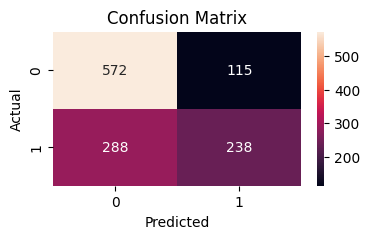

----------------------------------------------------------------------


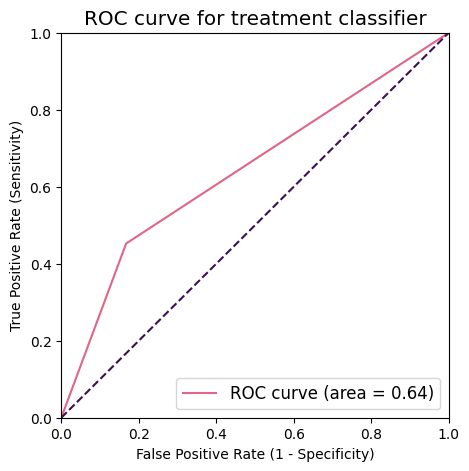

In [34]:
evaluation_metrics("SVM", test_Y, y_pred_test)

## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree classifer object
d_tree = DecisionTreeClassifier()
d_tree.fit(train_X, train_Y)
y_pred_d_tree = d_tree.predict(test_X)

Accuracy: 0.605111294311624
----------------------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67       687
           1       0.55      0.48      0.52       526

    accuracy                           0.61      1213
   macro avg       0.59      0.59      0.59      1213
weighted avg       0.60      0.61      0.60      1213

----------------------------------------------------------------------


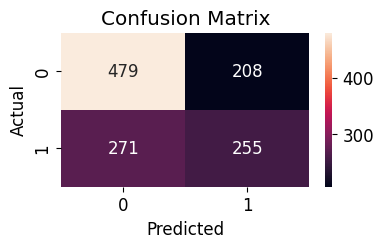

----------------------------------------------------------------------


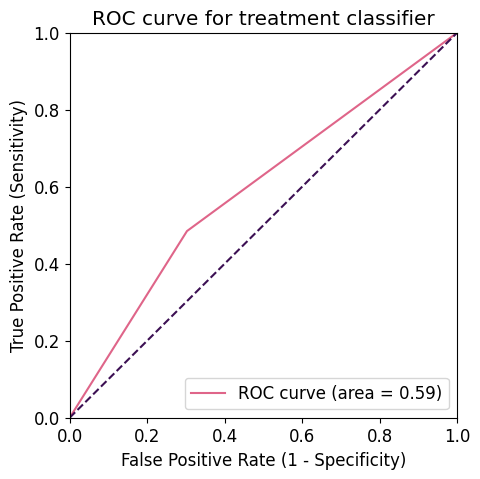

In [36]:
evaluation_metrics("Decison Tree", test_Y, y_pred_d_tree)

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 100 decision trees
random_forest = RandomForestClassifier()
random_forest.fit(train_X, train_Y)
y_pred_rf = random_forest.predict(test_X)

Accuracy: 0.6034624896949712
----------------------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.62      0.77      0.69       687
           1       0.56      0.39      0.46       526

    accuracy                           0.60      1213
   macro avg       0.59      0.58      0.57      1213
weighted avg       0.60      0.60      0.59      1213

----------------------------------------------------------------------


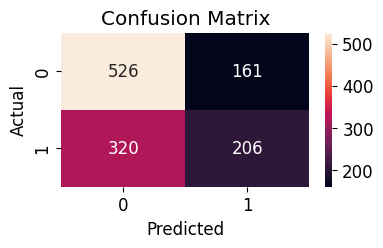

----------------------------------------------------------------------


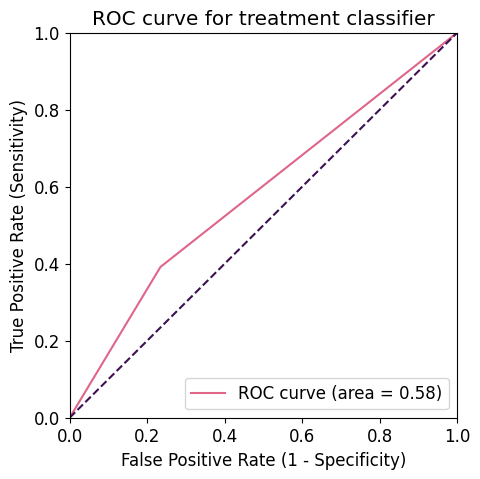

In [38]:
evaluation_metrics("Random Forest", test_Y, y_pred_rf)

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(train_X, train_Y)
y_pred_lr = logistic_regression.predict(test_X)

Accuracy: 0.6933223413025557
----------------------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.75       687
           1       0.68      0.56      0.61       526

    accuracy                           0.69      1213
   macro avg       0.69      0.68      0.68      1213
weighted avg       0.69      0.69      0.69      1213

----------------------------------------------------------------------


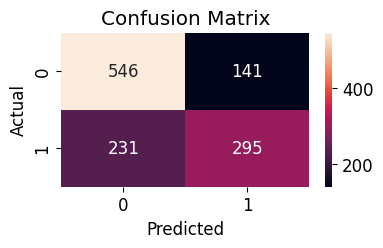

----------------------------------------------------------------------


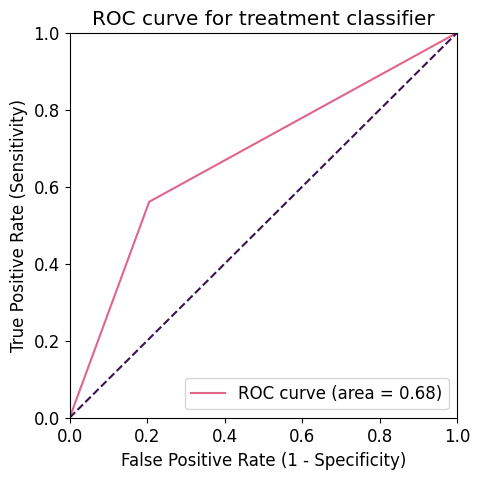

In [40]:
evaluation_metrics("Logistic Regression", test_Y, y_pred_lr)

## K-Nearest Neigbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_Y)
y_pred_knn = knn.predict(test_X)

Accuracy: 0.5028854080791426
----------------------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.56      0.61      0.58       687
           1       0.42      0.36      0.38       526

    accuracy                           0.50      1213
   macro avg       0.49      0.49      0.48      1213
weighted avg       0.49      0.50      0.50      1213

----------------------------------------------------------------------


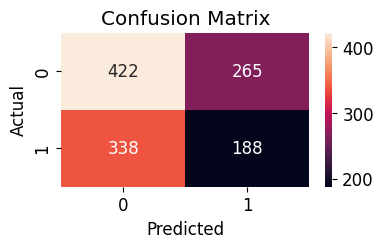

----------------------------------------------------------------------


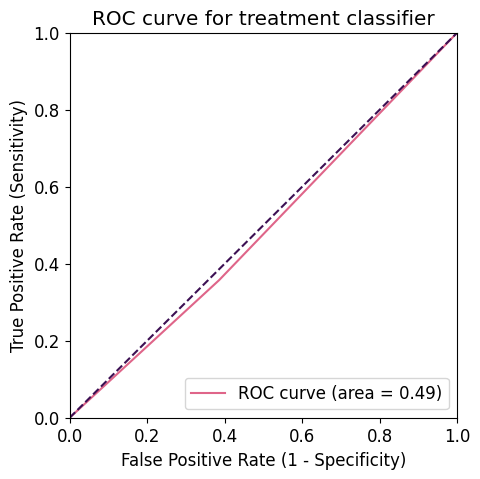

In [42]:
evaluation_metrics("KNN", test_Y, y_pred_knn)

## Model comparisons

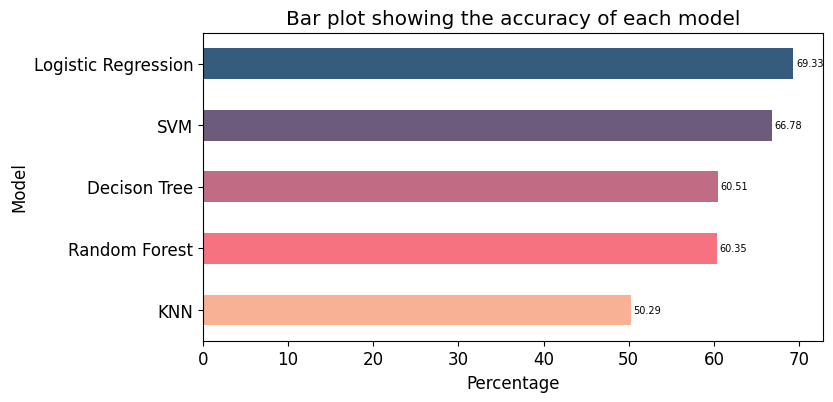

In [43]:
def plotSuccess():
    s = pd.Series(methodDict) # Convert the methodDict dictionary to a pandas Series
    s = s.sort_values(ascending=True) # Sort the series in ascending order
    plt.figure(figsize=(8,4))

    # Define colors for each bar
    colors = ["#F8B195", "#F67280", "#C06C84", "#6C5B7B", "#355C7D"]

    ax = s.plot(kind='barh', color = colors) # Plot the sorted series as horizontal bar chart

    # Add value labels to each bar
    for p in ax.patches:
        ax.annotate(str(round(p.get_width(), 2)), (p.get_width() * 1.005, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=7)

    plt.xlabel('Percentage')
    plt.ylabel('Model')
    plt.title('Bar plot showing the accuracy of each model')
    plt.show()

plotSuccess()

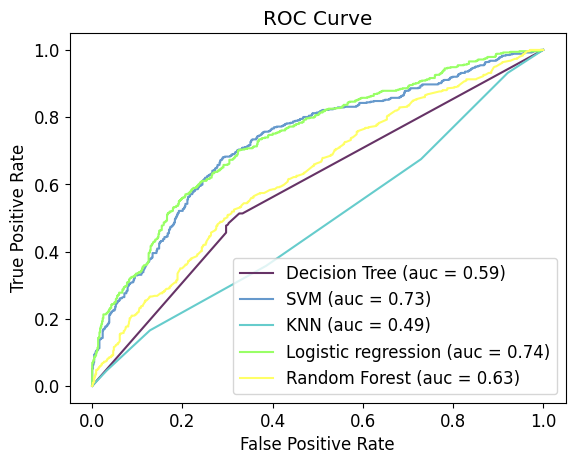

In [44]:
from sklearn.metrics import roc_curve,auc

# Compute the false positive rate, true positive rate and threshold values for each classifier
tree_fpr, tree_tpr, _ = roc_curve(test_Y, d_tree.predict_proba(test_X)[:,1])
forest_fpr, forest_tpr, _ = roc_curve(test_Y, random_forest.predict_proba(test_X)[:,1])
logistic_fpr, logistic_tpr, _ = roc_curve(test_Y, logistic_regression.predict_proba(test_X)[:,1])
knn_fpr, knn_tpr, _ = roc_curve(test_Y, knn.predict_proba(test_X)[:,1])
svm_fpr, svm_tpr, _ = roc_curve(test_Y, SupportVectorClassModel.predict_proba(test_X)[:,1])

# Compute the AUC score for each classifier
tree_auc = auc(tree_fpr, tree_tpr)
forest_auc = auc(forest_fpr, forest_tpr)
logistic_auc = auc(logistic_fpr, logistic_tpr)
knn_auc = auc(knn_fpr, knn_tpr)
svm_auc = auc(svm_fpr, svm_tpr)

# Plot the ROC curves and AUC scores for each classifier
plt.plot(tree_fpr, tree_tpr, label='Decision Tree (auc = %0.2f)' % tree_auc, color = '#663366')
plt.plot(svm_fpr, svm_tpr, label='SVM (auc = %0.2f)' % svm_auc,color = '#6699cc')
plt.plot(knn_fpr, knn_tpr, label='KNN (auc = %0.2f)' % knn_auc, color = '#66cccc')
plt.plot(logistic_fpr, logistic_tpr, label='Logistic regression (auc = %0.2f)' % logistic_auc, color = '#99ff66')
plt.plot(forest_fpr, forest_tpr, label='Random Forest (auc = %0.2f)' % forest_auc, color = '#ffff66')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Artificial Neural Network

In [45]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.metrics import categorical_crossentropy
from keras.metrics import Precision, Recall, AUC

In [46]:
X_train= np.concatenate((train_X, test_X))
Y_train= np.concatenate((train_Y, test_Y))

In [47]:
# Convert lists to NumPy arrays
array_train_X = np.array(X_train)
array_train_Y = np.array(Y_train)

In [51]:
model = Sequential([
Dense(16, input_shape=(1382,), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
])

In [52]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])

In [53]:
model.fit(array_train_X, array_train_Y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
152/152 [==============================] - 8s 20ms/step - loss: 0.8498 - accuracy: 0.5630 - precision_1: 0.3845 - recall_1: 0.1593 - auc_1: 0.5132 - val_loss: 0.7585 - val_accuracy: 0.5664 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_1: 0.5719
Epoch 2/20
152/152 [==============================] - 2s 15ms/step - loss: 0.7220 - accuracy: 0.5987 - precision_1: 0.3696 - recall_1: 0.0088 - auc_1: 0.5451 - val_loss: 0.7123 - val_accuracy: 0.5664 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_1: 0.5881
Epoch 3/20
152/152 [==============================] - 2s 11ms/step - loss: 0.6933 - accuracy: 0.6012 - precision_1: 0.5000 - recall_1: 5.1706e-04 - auc_1: 0.5369 - val_loss: 0.6946 - val_accuracy: 0.5664 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_1: 0.5934
Epoch 4/20
152/152 [==============================] - 2s 12ms/step - loss: 0.6787 - accuracy: 0.6009 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_1: 0.5614

In [54]:
scores = model.evaluate(array_train_X, array_train_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

cvscores = []
cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 59.42%
59.42% (+/- 0.00%)
